In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score 
from nltk.corpus import stopwords
import re

In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1000):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


KeyError: ignored

In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

629

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(new_corpus_customsp)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT WITH CUSTOM STOPWORDS APPLIED
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
714           learning  0.022896
626              image  0.022333
875            network  0.018623
1072            python  0.017240
882             neural  0.016779
630             images  0.016316
50            analysis  0.015929
39           algorithm  0.015651
1363           trained  0.015488
1346              time  0.014946
726               like  0.014819
10            accuracy  0.014608
488           features  0.014597
57             android  0.014112
69                 app  0.014023
756            machine  0.013823
40          algorithms  0.013622
818             models  0.013613
209     classification  0.013025
335               deep  0.012654
704           language  0.012272
883     neural network  0.011697
757   machine learning  0.011328
1220               set  0.011235
1336              text  0.010888
336      deep learning  0.010564
1056        processing  0.010457
1449           website  0.009597
231                cnn  0.009528
484            feature  0.009353

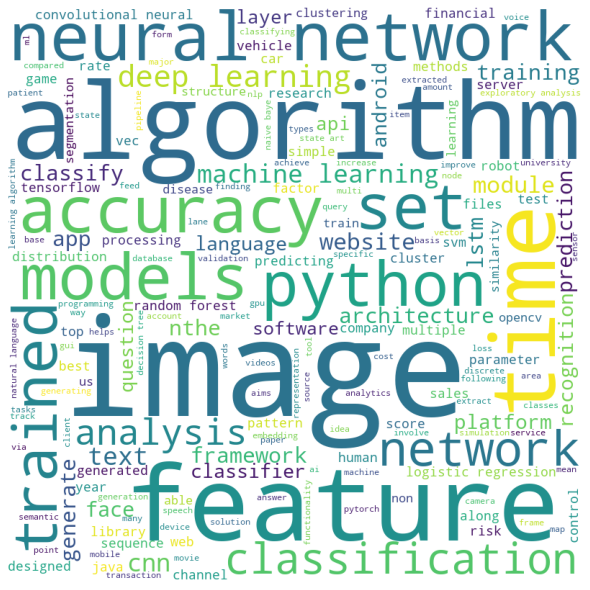

In [ ]:
new_corpus_customsp1 = ' '.join(new_corpus_customsp)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(new_corpus_customsp1) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 3,
    max_df = 0.7,
    max_features = None,
    stop_words = 'english'
)
tfidf.fit(new_corpus_customsp)
x = tfidf.transform(new_corpus_customsp)
x


<628x1303 sparse matrix of type '<class 'numpy.float64'>'
	with 8982 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


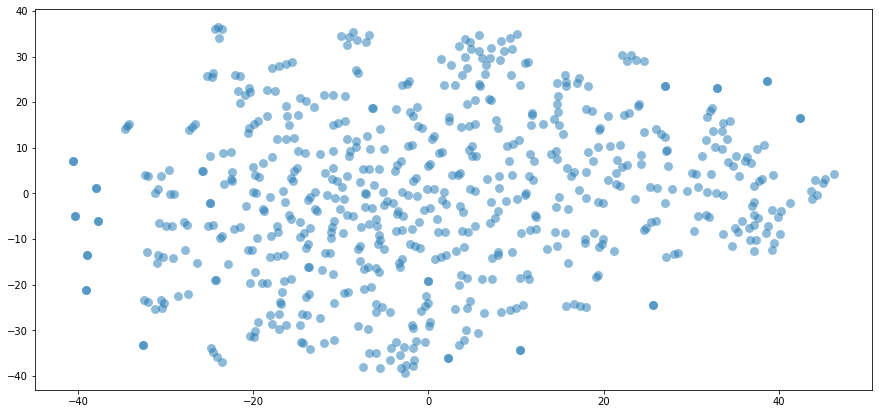

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(x, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

In [ ]:
from scipy.sparse import csr_matrix
A = csr_matrix(x)
y = A.toarray()
y 

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25484288, ..., 0.        , 0.        ,
        0.        ]])

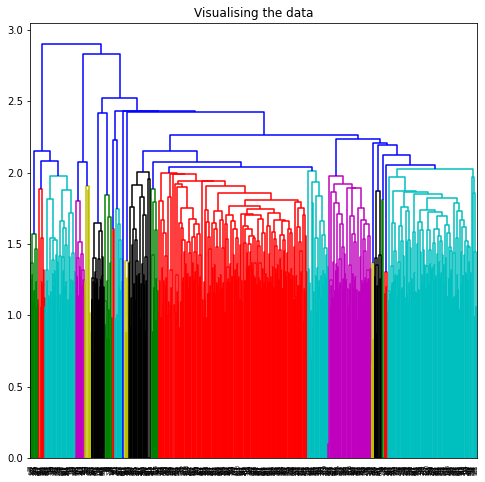

In [ ]:
#Visualizing the working of the Dendograms
import scipy.cluster.hierarchy as shc 
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(y, method ='ward'))) 

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = AgglomerativeClustering(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(y) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(y, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.0017950626826883172
For no of clusters = 3  The average silhouette_score is : 0.002359181496481598
For no of clusters = 4  The average silhouette_score is : 0.000382325028428723
For no of clusters = 5  The average silhouette_score is : 0.0014211057340492894
For no of clusters = 6  The average silhouette_score is : 0.0028419127362838384
For no of clusters = 7  The average silhouette_score is : 0.0038799010762332253
For no of clusters = 8  The average silhouette_score is : 0.0022986924150104637
For no of clusters = 9  The average silhouette_score is : 0.003548604426885087
For no of clusters = 10  The average silhouette_score is : 0.0046931418327812655


In [ ]:
#Building and Visualizing the different clustering models for different values of k
# k = 7
ac = AgglomerativeClustering(n_clusters = 7, linkage = 'ward') 
y_ac = ac.fit_predict(y)
print(y_ac)

[1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 3 1 1 3 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 3 1 3 1 3 1 1 2 2 1 1 3 1 1 1
 1 1 1 1 1 1 3 1 3 3 3 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 3 1 1 4 1 1 1 1 1 1 1 1 1 1 0 3 1 1 1 1 1 1 3 1 2 2 1 2 1 1 1 1 1 1 2 1 1
 6 1 0 1 1 1 1 1 4 4 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 6 3 1 1 3 3 3 1 1
 0 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 2 1 3 1 1 4 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 3 1 3 1 1 1 4 1 1 3 1 1 6 1 3 1 1 1 1 1 1 1 1 1 0 1 1 3 1 1 1 1 1 1 0 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 4 4 1 1 1 1 3 1 1 1 1 1 1 2 2 3 1 1 1 1 2 1
 2 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 6 1 1 1 1 1 1 1 1 3 3 1 1 1 3 1 1 1 1 0 4
 1 1 4 1 1 3 1 1 1 3 1 1 2 1 1 3 1 1 1 1 1 1 0 1 1 1 3 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 2 1 1 1 1 1 1 6 1 3 1 1 1 1 1 4 4 1
 1 1 1 1 1 1 4 1 1 1 1 1 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 2 1 1 1 1 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 

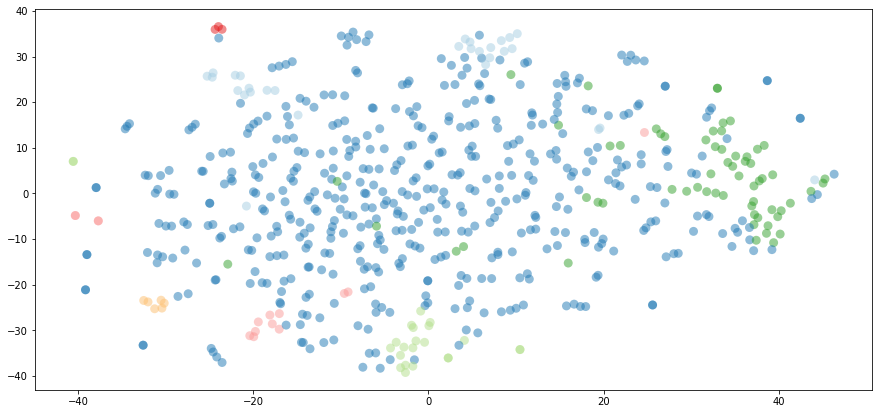

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[y] if y >= 0
                  else (0.5, 0.5, 0.5)
                  for y in y_ac]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
#first cluster
list1 = []
for i in range(len(y_ac)):
    if y_ac[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

29

In [ ]:
#projects in cluster 1
list1

['reviews cleaning visualization predicting sentiments reviews algorithms multinomial naive baye python accuracy end end web app link https tinyurl com sentiment',
 'top headlines date cleaning visualization predicting stock price news headlines algorithms logistic regression random forest multinomial naive bayes python accuracy',
 'sms messages cleaning visualization predicting sms spam ham algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com spam sms detector',
 'taken kaggle com news headlines cleaning visualization predicting news fake algorithms logistic regression multinomial naive bayes python accuracy',
 'taken kaggle com movie scripts script words associated genre cleaning visualization predicting genre movie words script algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com movie genre classifier',
 'independent features exploratory analysis cleaning visualization models classifying diabetes algorithms l

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
31                learning  0.214706
39                 machine  0.163695
40        machine learning  0.141135
42                   movie  0.092952
11          classification  0.088705
2               algorithms  0.085997
49                  python  0.079289
18           deep learning  0.078369
17                    deep  0.078369
53              regression  0.074437
0                 accuracy  0.071712
5                 analysis  0.060763
7                      app  0.057542
57                   tools  0.054577
50         python accuracy  0.049943
12                cleaning  0.049943
38     logistic regression  0.049723
37                logistic  0.049723
48              predicting  0.048953
51                  random  0.048627
52           random forest  0.048627
26                  forest  0.048627
20                     end  0.048352
33        learning machine  0.048093
47             ntechniques  0.046054
13  cleaning visualization  0.045794
60           visualization  0.045794
34                    like  0.044728
41                  models  0.043600
25                features  0.042682
32     learning algorithms  0.039727
54                    time  0.039492
14                     com  0.038033
16           decision tree  0.037495
59             tree random  0.037495
58                    tree  0.037495
15                decision  0.037495
43             multinomial  0.033583
45                   naive  0.033583
44       multinomial naive  0.033583

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of reviews is : 2
Frequency of cleaning is : 9
Frequency of visualization is : 8
Frequency of predicting is : 8
Frequency of sentiments is : 1
Frequency of algorithms is : 15
Frequency of multinomial is : 5
Frequency of naive is : 5
Frequency of baye is : 1
Frequency of python is : 13
Frequency of accuracy is : 11
Frequency of end is : 8
Frequency of web is : 5
Frequency of app is : 7
Frequency of link is : 4
Frequency of https is : 4
Frequency of tinyurl is : 3
Frequency of com is : 6
Frequency of sentiment is : 1
Frequency of top is : 1
Frequency of headlines is : 3
Frequency of date is : 1
Frequency of stock is : 1
Frequency of price is : 1
Frequency of news is : 3
Frequency of logistic is : 6
Frequency of regression is : 10
Frequency of random is : 7
Frequency of forest is : 7
Frequency of bayes is : 4
Frequency of sms is : 3
Frequency of messages is : 1
Frequency of spam is : 2
Frequency of ham is : 1
Frequency of detector is : 1
Frequency of taken is : 2
Frequency of ka

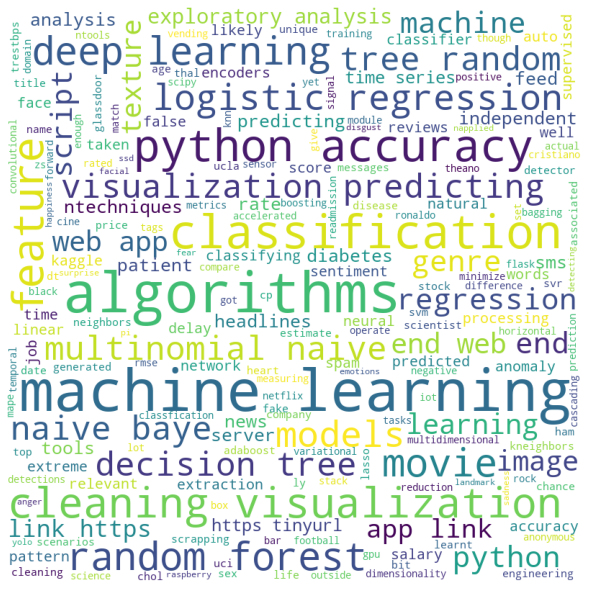

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_ac)):
    if y_ac[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

489

In [ ]:
list2

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
25           algorithm  0.018770
584           learning  0.018596
871             python  0.017233
32            analysis  0.017086
1103              time  0.015990
709            network  0.015988
510              image  0.015036
666             models  0.014614
1116           trained  0.014572
8             accuracy  0.014392
593               like  0.014310
393           features  0.014158
995                set  0.013773
574           language  0.013438
26          algorithms  0.013392
714             neural  0.011508
1096              text  0.011227
390            feature  0.010861
858         processing  0.010628
619            machine  0.010449
164     classification  0.010146
434               game  0.009970
268               deep  0.009494
1118          training  0.008910
1036             state  0.008573
617               lstm  0.008520
167         classifier  0.008375
344                end  0.008306
620   machine learning  0.008291
715     neural network  0.008161

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 3
Frequency of duplication is : 2
Frequency of faces is : 3
Frequency of major is : 9
Frequency of challenges is : 4
Frequency of dup is : 1
Frequency of algorithm is : 61
Frequency of complexity is : 4
Frequency of means is : 5
Frequency of time is : 61
Frequency of get is : 21
Frequency of answer is : 11
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 10
Frequency of solved is : 3
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 7
Frequency of achieve is : 12
Frequency of tradeoff is : 1
Frequency of precision is : 4
Frequency of recall is : 5
Frequency of improves is : 2
Frequency of score is : 18
Frequency of machine is : 30
Frequency of learning is : 71
Frequency of collecting is : 3
Frequency of training is : 25
Frequency of analyze is : 6
Frequency of steel is : 2
Frequency of cast is : 1
Frequency of limited is : 4
Frequency of forging is : 1
Frequency of companys is : 3
Frequency of 

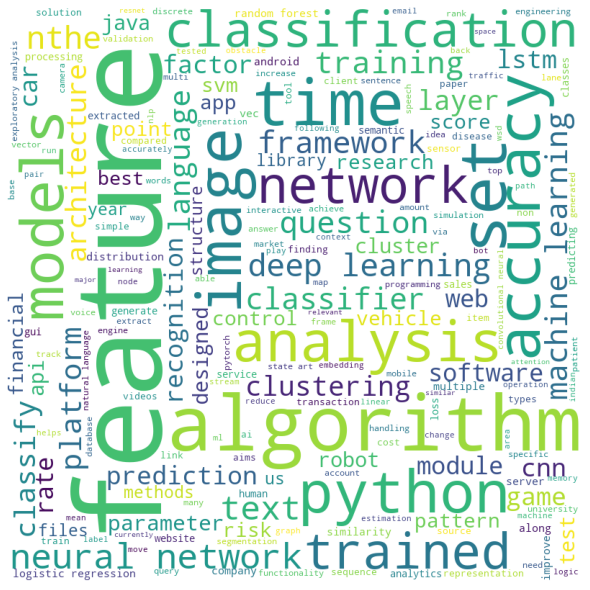

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
#first cluster
list3 = []
for i in range(len(y_ac)):
    if y_ac[i] == 2:
        list3.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list3)

23

In [ ]:
list3

['android app driving collecting smart phone sensors like accelerometer gps gyroscope unsafe harsh driving k means clustering algorithm found thresholds events brake acceleration left turn right turn thresholds separate automata events automata time basis accuracy around android studio java',
 'android app driving collecting smart phone sensors like accelerometer gps gyroscope unsafe harsh driving k means clustering algorithm found thresholds events brake acceleration left turn right turn thresholds separate automata events automata time basis accuracy around android studio java',
 'android app guides visually impaired recognizing objects smartphone camera time app text speech give objects detected class recognizes human faces attributes like age gender emotion app also recognizes text image ntools ssd mobilenet v cnn microsoft cognitive face api recognizing face attributes firebase ml kit ocr tensorflow lite converter api android app',
 'android app helps visually impaired navigate an

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
1          android  0.378114
2      android app  0.144819
7           module  0.116764
3              api  0.104916
14            time  0.083097
0         advanced  0.083026
9           neural  0.073445
8          network  0.072353
11           phone  0.068026
6             like  0.059037
10  neural network  0.056828
5             java  0.051840
13      smartphone  0.047481
4              gps  0.044494
12         program  0.020653

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of android is : 33
Frequency of app is : 31
Frequency of driving is : 4
Frequency of collecting is : 2
Frequency of smart is : 2
Frequency of phone is : 3
Frequency of sensors is : 2
Frequency of like is : 4
Frequency of accelerometer is : 2
Frequency of gps is : 3
Frequency of gyroscope is : 2
Frequency of unsafe is : 2
Frequency of harsh is : 2
Frequency of k is : 2
Frequency of means is : 2
Frequency of clustering is : 2
Frequency of algorithm is : 2
Frequency of found is : 2
Frequency of thresholds is : 4
Frequency of events is : 4
Frequency of brake is : 2
Frequency of acceleration is : 2
Frequency of left is : 2
Frequency of turn is : 4
Frequency of right is : 2
Frequency of separate is : 2
Frequency of automata is : 4
Frequency of time is : 5
Frequency of basis is : 2
Frequency of accuracy is : 2
Frequency of around is : 2
Frequency of studio is : 2
Frequency of java is : 3
Frequency of guides is : 1
Frequency of visually is : 2
Frequency of impaired is : 2
Frequency o

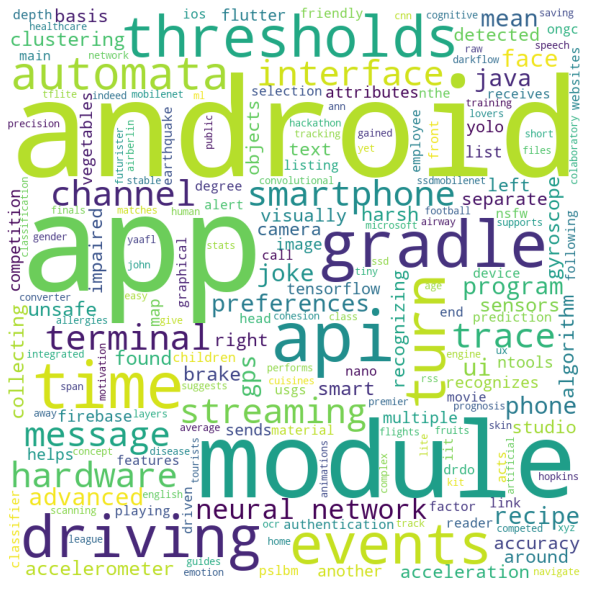

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
#first cluster
list4 = []
for i in range(len(y_ac)):
    if y_ac[i] == 3:
        list4.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list4)

63

In [ ]:
list4

['end end pipeline abnormalities chest x ray top chexpert chest x ray competition nhttps stanfordmlgroup io competitions chexpert stanford datasets chest x ray images multiple image processing balancing adaptive histogram equalization augmentation classification densenet architecture improving accuracy disease ensemble models',
 'designing software air collaborative robot detecting position aeroplane cracks corrosion inspection body aeroplane trained predefined images cracks corrosion lidar air cobot aircraft inspection capturing live image processing opencv labelling images labelme software',
 'cbir inria holidays colour histogram image ndescriptor extract features images indexed images image descriptor stored csv chi squared distance metric similarity images returned top nresults matching query image introducing deep neural network extract features nunderstanding rather image composition',
 'preprocessing ct scan images lungs noise removal median filter gaussian nfilter gamma correct

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
42                 image  0.138341
44                images  0.120448
66                neural  0.089107
63               network  0.082018
93               trained  0.067073
67        neural network  0.065496
27                  face  0.058348
65              networks  0.055024
15                   cnn  0.051206
22                  deep  0.050846
49              learning  0.049655
35              generate  0.045850
6           architecture  0.045044
78                python  0.044338
12        classification  0.043571
88            tensorflow  0.042254
77            processing  0.040755
68       neural networks  0.040439
80           recognition  0.038897
11                 class  0.038860
31              features  0.038116
47              language  0.036725
23         deep learning  0.036103
41                 human  0.035744
18         convolutional  0.035452
72                opencv  0.034943
86                simple  0.033968
19  convolutional neural  0.031582
20                 covid  0.031298
16           convolution  0.029618

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of end is : 4
Frequency of pipeline is : 5
Frequency of abnormalities is : 1
Frequency of chest is : 3
Frequency of x is : 9
Frequency of ray is : 5
Frequency of top is : 4
Frequency of chexpert is : 2
Frequency of competition is : 1
Frequency of nhttps is : 1
Frequency of stanfordmlgroup is : 1
Frequency of io is : 1
Frequency of competitions is : 1
Frequency of stanford is : 1
Frequency of datasets is : 3
Frequency of images is : 47
Frequency of multiple is : 5
Frequency of image is : 49
Frequency of processing is : 10
Frequency of balancing is : 1
Frequency of adaptive is : 1
Frequency of histogram is : 2
Frequency of equalization is : 1
Frequency of augmentation is : 3
Frequency of classification is : 12
Frequency of densenet is : 1
Frequency of architecture is : 10
Frequency of improving is : 2
Frequency of accuracy is : 7
Frequency of disease is : 1
Frequency of ensemble is : 1
Frequency of models is : 8
Frequency of designing is : 2
Frequency of software is : 3
Frequen

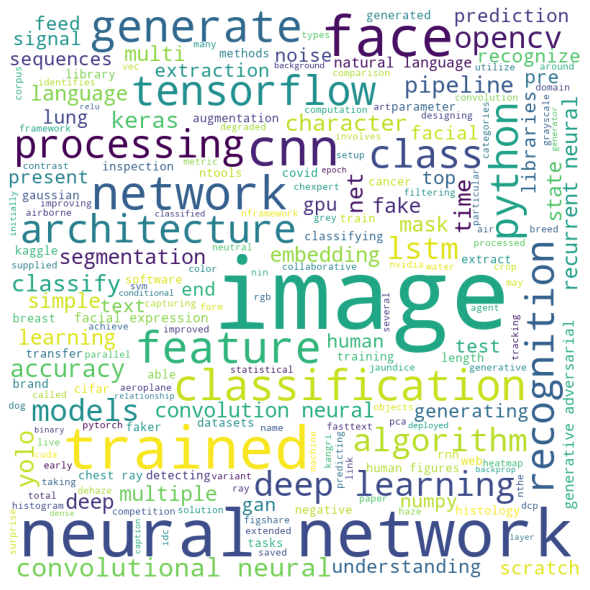

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_ac)):
    if y_ac[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

15

In [ ]:
list5

['website showcase photography interested photographers nthe website html css javascript ncurrently website four contributors photographs ni server side website respond requests feedback nhave look recommended view laptop desktop nwww pixelstarlab com',
 'went live onto yahoo website regularly alerts generated discrepancy ntechnologies java pig hadoop big',
 'went live onto yahoo website regularly alerts generated discrepancy ntechnologies java pig hadoop big',
 'course hosting website like coursera nused mongo database express backend server angular js dynamic website node js framework nit features self assessments assignment submissions timetable planner',
 'designed responsive dating website java jsps postgresql db nimplemented features like networking site nworked mainly back end making er removing redundancy tables sql queries',
 'website handsforhelp website like html css javascript collaboration platform',
 'website sac affairs council smvdu website like html css javascript coll

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
12            like  0.173316
3              end  0.150079
4         features  0.124067
9             java  0.117328
0              big  0.095247
14      pig hadoop  0.095247
13             pig  0.095247
10        java pig  0.095247
16           yahoo  0.095247
6       hadoop big  0.095247
5           hadoop  0.095247
15    website like  0.092208
1              css  0.081368
7             html  0.081368
11      javascript  0.081368
2   css javascript  0.081368
8         html css  0.081368

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of website is : 18
Frequency of showcase is : 1
Frequency of photography is : 1
Frequency of interested is : 1
Frequency of photographers is : 1
Frequency of nthe is : 1
Frequency of html is : 3
Frequency of css is : 3
Frequency of javascript is : 3
Frequency of ncurrently is : 1
Frequency of four is : 1
Frequency of contributors is : 1
Frequency of photographs is : 1
Frequency of ni is : 1
Frequency of server is : 2
Frequency of side is : 1
Frequency of respond is : 1
Frequency of requests is : 1
Frequency of feedback is : 1
Frequency of nhave is : 1
Frequency of look is : 1
Frequency of recommended is : 1
Frequency of view is : 1
Frequency of laptop is : 1
Frequency of desktop is : 1
Frequency of nwww is : 1
Frequency of pixelstarlab is : 1
Frequency of com is : 1
Frequency of went is : 2
Frequency of live is : 2
Frequency of onto is : 2
Frequency of yahoo is : 4
Frequency of regularly is : 2
Frequency of alerts is : 2
Frequency of generated is : 2
Frequency of discrepancy 

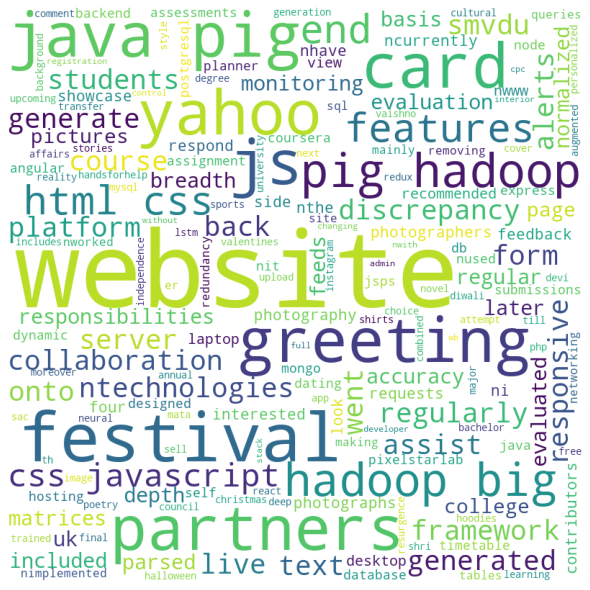

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
#first cluster(DUPLICATES)
list6 = []
for i in range(len(y_ac)):
    if y_ac[i] == 5:
        list6.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list6)

3

In [ ]:
list6

['recommendation engine along text analysis pabitra mitra',
 'recommendation engine along text analysis pabitra mitra',
 'recommendation engine along text analysis pabitra mitra']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list6)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

ValueError: ignored

In [ ]:
#first cluster
list7 = []
for i in range(len(y_ac)):
    if y_ac[i] == 6:
        list7.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list7)

6

In [ ]:
list7

['impact store promotions price reductions pids moving par ticular category sales identified price thresholds evaluated impact modeling mixed modeling ndata preparation modeling tool sas',
 'predictive likely move segment pyramid consistent consistent best target via suitable campaign modeling logistic regression ndata preparation modeling tool sql sas',
 'detailed exploratory analysis sas key marketing vehicles affecting sales company cpg industry multivariate linear regression statistical major impacting revenue company rois brands identifying activities return optimal marketing activity modeling multivariate regression ndata preparation modeling tool sas',
 'inactive longer usual shopping gap target retention strategy nbuild predictive risk attrition nmodeling accelerated failure time ndata preparation modeling tool sql sas',
 'scope involves determining digital marketing activities spends drive sales across channels analysis would optimising spends spend allocation leads maximum im

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list7)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
1       marketing  0.328833
6           sales  0.235564
7        tool sas  0.179623
0      activities  0.164932
2           mixed  0.145389
3  mixed modeling  0.145389
4  modeling mixed  0.145389
5  modeling ndata  0.145389

In [ ]:
list70 = ' '.join(list7)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list70)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of impact is : 4
Frequency of store is : 1
Frequency of promotions is : 1
Frequency of price is : 2
Frequency of reductions is : 1
Frequency of pids is : 1
Frequency of moving is : 2
Frequency of par is : 1
Frequency of ticular is : 1
Frequency of category is : 1
Frequency of sales is : 4
Frequency of identified is : 1
Frequency of thresholds is : 1
Frequency of evaluated is : 1
Frequency of modeling is : 14
Frequency of mixed is : 3
Frequency of ndata is : 6
Frequency of preparation is : 6
Frequency of tool is : 6
Frequency of sas is : 8
Frequency of predictive is : 2
Frequency of likely is : 1
Frequency of move is : 1
Frequency of segment is : 1
Frequency of pyramid is : 1
Frequency of consistent is : 2
Frequency of best is : 2
Frequency of target is : 2
Frequency of via is : 1
Frequency of suitable is : 2
Frequency of campaign is : 1
Frequency of logistic is : 1
Frequency of regression is : 3
Frequency of sql is : 2
Frequency of detailed is : 1
Frequency of exploratory is 

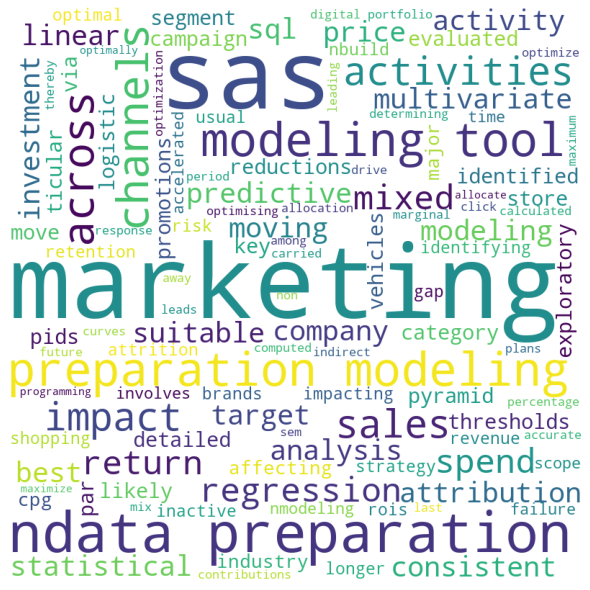

In [ ]:
list70 = ' '.join(list7)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list70) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 